#### **Import libraries**

In [1]:
## Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### **Load the data**

In [2]:
## Load the data
kamis_df = pd.read_csv(r'C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices.csv')
agri_df = pd.read_csv(r'C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\agribora_maize_prices.csv')

In [3]:

print(kamis_df.head())

  Commodity_Classification  Commodity Classification   County  \
0          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
1          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
2          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
3          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
4          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   

            Market       Date  Year  Month Year_Month  WeekofYear Year_Week  \
0   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
1  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
2  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
3   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
4   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   

   SupplyVolume  Retail  Wholesale Unit  
0       14000.0    30.0      27.00   Kg  
1        2000.0    40.0      22.22   Kg  
2       

In [4]:
agri_df.head()

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40
2,Kisumu,2023-10-03,44.44,Dry_White_Maize,2023-40,40
3,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40
4,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40


In [5]:
# Selecting all entries with White Maize
kdf = kamis_df[kamis_df['Commodity_Classification'].str.contains("White_Maize", na=False)].copy()

In [6]:
kdf.head(5)

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,Year_Week,SupplyVolume,Retail,Wholesale,Unit
0,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,5/24/2021,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
1,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,5/24/2021,2021,5,2021-05,21,2021-21,2000.0,40.0,22.22,Kg
2,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,5/24/2021,2021,5,2021-05,21,2021-21,2700.0,30.0,25.00,Kg
3,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,5/24/2021,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
4,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,5/24/2021,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg


In [7]:
## Selecting all entries in the agriBORA set with White Maize (all the data)
agri_df = agri_df[agri_df['Commodity_Classification'].str.contains("White_Maize", na=False)].copy()
agri_df.shape

(808, 6)

In [8]:
## The unique counties in the agriBORA dataset
agri_df.County.unique()

array(['Nairobi', 'Kirinyaga', 'Kisumu', 'Uasin-Gishu', 'Kiambu', 'Embu',
       'Nyeri', 'Mombasa', nan, 'Bungoma', 'Meru', 'Busia', 'Kakamega',
       'Nakuru', 'Machakos', 'Kajiado', 'Trans-Nzoia'], dtype=object)

In [9]:
## The unique counties in the KAMIS dataset
kdf.County.unique()

array(['Baringo', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Garissa',
       'Homa-Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu',
       'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Laikipia',
       'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa',
       'Nairobi', 'Nakuru', 'Nandi', 'Nyamira', 'Nyeri', 'Siaya',
       'Taita-Taveta', 'Tharaka-Nithi', 'Turkana', 'Uasin-Gishu',
       'Vihiga', 'West-Pokot', 'Bomet', 'Machakos', 'Muranga', 'Embu',
       'Trans-Nzoia', 'Samburu', 'Narok', 'Nyandarua', 'Tana-River',
       'Kwale', 'Lamu'], dtype=object)

In [10]:
## The counties of interest
target_counties = {"Kiambu","Kirinyaga","Mombasa","Nairobi","Uasin-Gishu"}

In [11]:
## Restricting myself to target counties
kdf = kdf[kdf['County'].isin(target_counties)]
agri_df = agri_df[agri_df['County'].isin(target_counties)]

In [12]:
## Select the price columns (Wholesale)
kdf['price'] = pd.to_numeric(kdf['Wholesale'], errors='coerce')
agri_df['price'] = pd.to_numeric(agri_df['WholeSale'], errors='coerce')

In [13]:
## Convert Date to datetime object
kdf['Date'] = pd.to_datetime(kdf['Date'])
agri_df['Date'] = pd.to_datetime(agri_df['Date'])

In [14]:
# Weekly alignment (use Monday as start of ISO week)
agri_df["week"] = agri_df["Date"].dt.to_period("W").apply(lambda p: p.start_time)
kdf["week"] = kdf["Date"].dt.to_period("W").apply(lambda p: p.start_time)

In [15]:
agri_df.head()

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear,price,week
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40,50.00,2023-10-02
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40,48.89,2023-10-02
3,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40,46.67,2023-10-02
4,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40,46.67,2023-10-02
5,Nairobi,2023-10-04,50.00,Dry_White_Maize,2023-40,40,50.00,2023-10-02


In [16]:
## Aggregate to Count-Week wholesale mean
kdf_week = (
    kdf.groupby(['County', 'week'], as_index=False)['price']
    .mean()
    .rename(columns={'price' : 'kamis_price'})
)

agri_df_week = (
    agri_df.groupby(['County', 'week'], as_index=False)['price']
    .mean()
    .rename(columns={'price': 'agri_price'})
)

In [17]:
kdf_week.head()

,County,week,kamis_price
0,Kiambu,2021-05-24,29.951304
1,Kiambu,2021-06-07,30.560000
2,Kiambu,2021-06-14,30.560000
3,Kiambu,2021-07-19,31.110000
4,Kiambu,2021-07-26,31.110000


In [18]:
agri_df_week.head()

,County,week,agri_price
0,Kiambu,2023-10-02,46.67
1,Kiambu,2024-01-15,47.78
2,Kiambu,2024-02-05,47.78
3,Kiambu,2024-02-12,44.44
4,Kiambu,2024-03-04,37.78


In [19]:
## How many weeks of data is covered in each table ?

coverage_agr = (agri_df_week.groupby("County")["week"]
           .agg(min_date="min", max_date="max", weeks="nunique")
           .reset_index())
coverage_agr["dataset"] = "agribora"

coverage_kam = (kdf_week.groupby("County")["week"]
           .agg(min_date="min", max_date="max", weeks="nunique")
           .reset_index())
coverage_kam["dataset"] = "kamis"

In [20]:
coverage = pd.concat([coverage_agr, coverage_kam], ignore_index=True)

In [21]:
coverage

,County,min_date,max_date,weeks,dataset
0,Kiambu,2023-10-02,2025-10-06,30,agribora
1,Kirinyaga,2023-10-02,2025-08-04,25,agribora
2,Mombasa,2024-02-05,2025-08-11,17,agribora
3,Nairobi,2023-10-02,2025-10-06,56,agribora
4,Uasin-Gishu,2023-10-02,2025-10-06,74,agribora
5,Kiambu,2021-05-24,2023-08-07,32,kamis
6,Kirinyaga,2021-05-24,2025-07-28,186,kamis
7,Mombasa,2021-05-24,2023-08-21,41,kamis
8,Nairobi,2021-05-24,2025-07-28,180,kamis
9,Uasin-Gishu,2021-05-24,2025-06-09,153,kamis


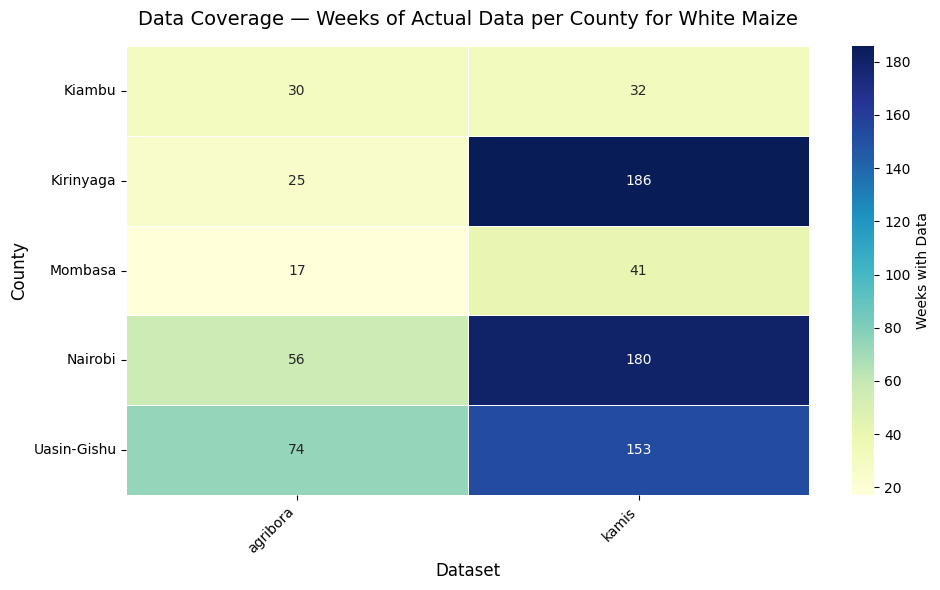

In [22]:
# --- Step 1️⃣: Create pivot table for visualization ---
pivot_cov = (
    coverage
    .pivot_table(
        index="County",
        columns="dataset",
        values="weeks",
    )
    .fillna(0)
)

# --- Step 2️⃣: Plot heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_cov,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Weeks with Data"}
)

plt.title("Data Coverage — Weeks of Actual Data per County for White Maize", fontsize=14, pad=15)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
# Is there an overlap between kamis & agribora data ?
overlap = (
    agri_df_week.merge(kdf_week, on=['County', 'week'], how='inner')
    .sort_values(['County', 'week'])
)

In [24]:
overlap

,County,week,agri_price,kamis_price
0,Kirinyaga,2023-10-02,48.890000,43.776000
1,Kirinyaga,2023-10-16,45.560000,51.480000
2,Kirinyaga,2023-10-30,42.036667,45.901250
3,Kirinyaga,2023-11-06,42.500000,44.664000
4,Kirinyaga,2023-11-13,43.335000,42.960000
...,...,...,...,...
80,Uasin-Gishu,2024-09-23,33.330000,40.000000
81,Uasin-Gishu,2025-05-19,50.925000,45.000000
82,Uasin-Gishu,2025-05-26,52.220000,65.000000
83,Uasin-Gishu,2025-06-02,46.925000,61.666667


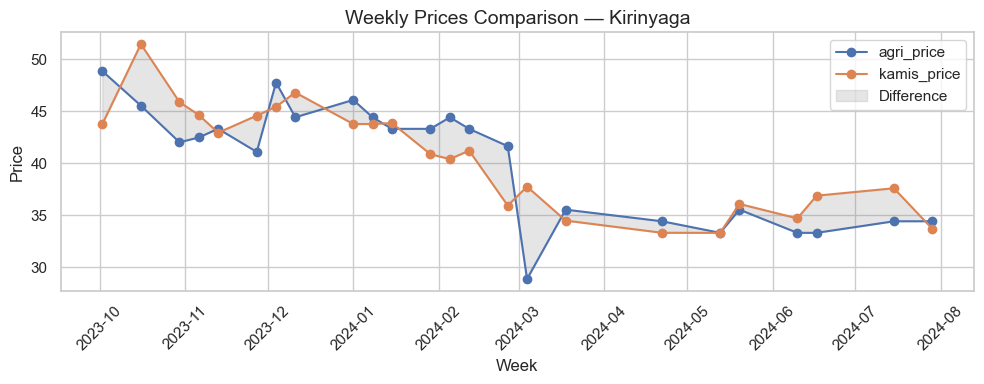

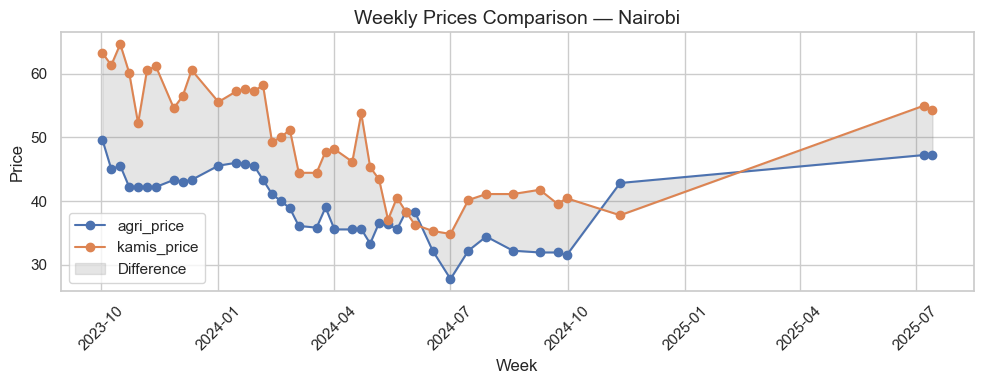

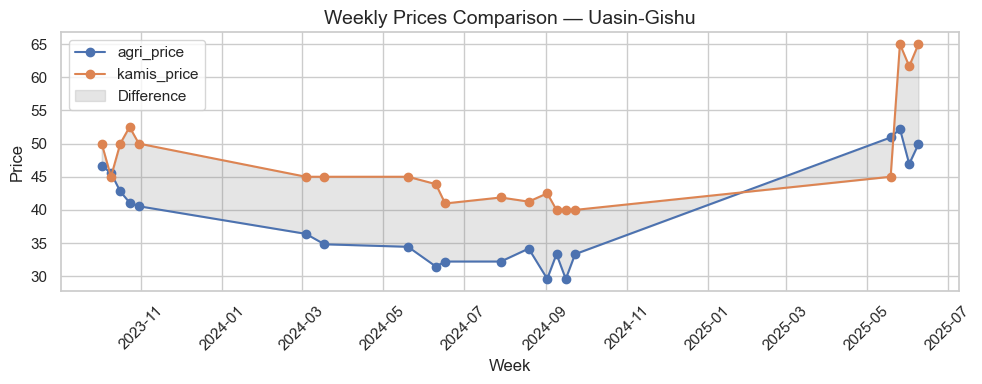

In [25]:
# Ensure 'week' is datetime or sortable
overlap['week'] = pd.to_datetime(overlap['week'])

# Set style
sns.set(style="whitegrid")

# List of counties
counties = overlap['County'].unique()

# Plot each county
for county in counties:
    df = overlap[overlap['County'] == county]

    plt.figure(figsize=(10, 4))

    # Plot agr_price and kamis_price
    plt.plot(df['week'], df['agri_price'], marker='o', label='agri_price')
    plt.plot(df['week'], df['kamis_price'], marker='o', label='kamis_price')

    # Shade the difference
    plt.fill_between(df['week'], df['agri_price'], df['kamis_price'],
                     color='gray', alpha=0.2, label='Difference')

    plt.title(f"Weekly Prices Comparison — {county}", fontsize=14)
    plt.xlabel("Week")
    plt.ylabel("Price")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:
## Do some stats if the overlap is not empty

if not overlap.empty:
    overlap["diff"] = overlap["agri_price"] - overlap["kamis_price"]
    stats = overlap.groupby("County").agg(
        n=("agri_price","size"),
        corr=("agri_price", lambda x: np.corrcoef(x, overlap.loc[x.index,"kamis_price"])[0,1] if len(x)>2 else np.nan),
        mean_bias=("diff","mean"),
        mae=("diff", lambda x: np.abs(x).mean())
    ).reset_index().round(3)
else:
    stats = pd.DataFrame(columns=["county_norm","n","corr","mean_bias","mae"])

In [27]:
stats

,County,n,corr,mean_bias,mae
0,Kirinyaga,24,0.793,-0.333,2.662
1,Nairobi,41,0.809,-9.890,10.235
2,Uasin-Gishu,20,0.790,-8.570,9.218


In [28]:
agri_df_week.shape, kdf_week.shape

((202, 3), (592, 3))

### Forecast idea

1. Forecast using KAMIS only
2. Learn a mapping function: KAMIS -> AgriBORA
3. Apply the mapping to convert forecasts into AgriBORA space

In [29]:
## Back kdf_week & agri_df_week
kdf_week.head()

,County,week,kamis_price
0,Kiambu,2021-05-24,29.951304
1,Kiambu,2021-06-07,30.560000
2,Kiambu,2021-06-14,30.560000
3,Kiambu,2021-07-19,31.110000
4,Kiambu,2021-07-26,31.110000


In [30]:
agri_df_week.head()

,County,week,agri_price
0,Kiambu,2023-10-02,46.67
1,Kiambu,2024-01-15,47.78
2,Kiambu,2024-02-05,47.78
3,Kiambu,2024-02-12,44.44
4,Kiambu,2024-03-04,37.78


## Another Idea

- Use spatial features
- Find the closest county to a target county and use data for that county to fill in missing weeks of data from KAMIS if needed

In [31]:
agr = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\agribora_maize_prices.csv", parse_dates=["Date"])
kamis = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices.csv", parse_dates=["Date"])

# Filter to white maize
agr = agr[agr["Commodity_Classification"].str.contains("White_Maize", na=False)].copy()
kamis = kamis[kamis["Commodity_Classification"].str.contains("White_Maize", na=False)].copy()

def norm_county(s):
    return s.strip() if isinstance(s, str) else s

agr["county_norm"] = agr["County"].apply(norm_county)
kamis["county_norm"] = kamis["County"].apply(norm_county)

target_counties = ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]
agr = agr[agr["county_norm"].isin(target_counties)].copy()
kamis = kamis[kamis["county_norm"].isin(target_counties)].copy()

# Weekly aggregation
agr["week_start"] = agr["Date"].dt.to_period("W").apply(lambda p: p.start_time)
kamis["week_start"] = kamis["Date"].dt.to_period("W").apply(lambda p: p.start_time)

agr["agr_price"] = pd.to_numeric(agr["WholeSale"], errors="coerce")
kamis["kamis_price"] = pd.to_numeric(kamis["Wholesale"], errors="coerce")

agr_week = agr.groupby(["county_norm", "week_start"], as_index=False)["agr_price"].mean()
kamis_week = kamis.groupby(["county_norm", "week_start"], as_index=False)["kamis_price"].mean()

In [32]:
kamis_week.head()

,county_norm,week_start,kamis_price
0,Kiambu,2021-05-24,29.951304
1,Kiambu,2021-06-07,30.560000
2,Kiambu,2021-06-14,30.560000
3,Kiambu,2021-07-19,31.110000
4,Kiambu,2021-07-26,31.110000


In [33]:
# Kenyan county centroid coordinates (approximate)
# Source: Public GIS datasets / government county shapefiles (preloaded here manually)
data = {
    "county_norm": [
        "Baringo", "Bomet", "Bungoma", "Busia", "Elgeyo-Marakwet", "Embu",
        "Garissa", "Homa Bay", "Isiolo", "Kajiado", "Kakamega", "Kericho",
        "Kiambu", "Kilifi", "Kirinyaga", "Kisii", "Kisumu", "Kitui",
        "Kwale", "Laikipia", "Lamu", "Machakos", "Makueni", "Mandera",
        "Marsabit", "Meru", "Migori", "Mombasa", "Murang'a", "Nairobi",
        "Nakuru", "Nandi", "Narok", "Nyamira", "Nyandarua", "Nyeri",
        "Samburu", "Siaya", "Taita-Taveta", "Tana River", "Tharaka-Nithi",
        "Trans Nzoia", "Turkana", "Uasin-Gishu", "Vihiga", "Wajir", "West Pokot"
    ],
    "latitude": [
        0.469, -0.801, 0.569, 0.434, 1.046, -0.531,
        -0.453, -0.495, 0.352, -2.098, 0.307, -0.377,
        -1.030, -3.510, -0.498, -0.681, -0.091, -1.366,
        -4.175, 0.421, -2.162, -1.517, -2.247, 3.937,
        3.544, 0.355, -1.064, -4.043, -0.783, -1.286,
        -0.303, 0.205, -1.145, -0.566, -0.258, -0.419,
        0.993, -0.133, -3.316, -1.845, -0.283, 1.010,
        3.118, 0.539, 0.023, 1.748, 1.532
    ],
    "longitude": [
        35.990, 35.342, 34.564, 34.124, 35.363, 37.456,
        39.654, 34.639, 38.570, 36.789, 34.751, 35.279,
        36.868, 39.800, 37.318, 34.778, 34.761, 38.015,
        39.458, 36.787, 40.902, 37.263, 37.892, 41.847,
        37.998, 37.655, 34.473, 39.668, 36.605, 36.816,
        36.188, 35.117, 35.860, 34.935, 36.574, 36.947,
        37.537, 34.266, 37.757, 39.507, 37.908, 35.021,
        35.587, 35.283, 34.729, 40.060, 35.162
    ]
}

centroids = pd.DataFrame(data)
centroids.head()

,county_norm,latitude,longitude
0,Baringo,0.469,35.990
1,Bomet,-0.801,35.342
2,Bungoma,0.569,34.564
3,Busia,0.434,34.124
4,Elgeyo-Marakwet,1.046,35.363


In [34]:
import plotly.express as px

fig = px.scatter_mapbox(
    centroids,
    lat="latitude",
    lon="longitude",
    size="SupplyVolume",
    hover_name=agri_df["county"]",
    hover_data={agri_df["SupplyVolume"]:True, "latitude":False, "longitude":False},
    zoom=5,
    size_max=50,
    mapbox_style="carto-positron"
)
fig.show()


SyntaxError: unterminated string literal (detected at line 8) (1369869045.py, line 8)

In [ ]:
present_counties = kamis_week["county_norm"].unique().tolist()
centroids = centroids[centroids["county_norm"].isin(present_counties)].reset_index(drop=True)

# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute full distance matrix
counties = centroids["county_norm"].tolist()
dist_matrix = pd.DataFrame(np.zeros((len(counties), len(counties))),
                           index=counties, columns=counties)

for i, c1 in centroids.iterrows():
    for j, c2 in centroids.iterrows():
        dist_matrix.loc[c1["county_norm"], c2["county_norm"]] = haversine(
            c1["latitude"], c1["longitude"],
            c2["latitude"], c2["longitude"]
        )

# Compute nearest 3 neighbours for each county
nearest = {}
for c in counties:
    sorted_nei = dist_matrix.loc[c].sort_values()
    nearest[c] = list(sorted_nei.index[1:4])  # Skip itself at index 0

nearest_df = pd.DataFrame({
    "county": counties,
    "nearest_1": [nearest[c][0] for c in counties],
    "nearest_2": [nearest[c][1] for c in counties],
    "nearest_3": [nearest[c][2] for c in counties],
})

dist_matrix.shape

(5, 5)

In [ ]:
dist_matrix

,Kiambu,Kirinyaga,Mombasa,Nairobi,Uasin-Gishu
Kiambu,0.000000,77.477138,457.131482,29.046978,247.986697
Kirinyaga,77.477138,0.000000,472.795397,103.887424,253.964938
Mombasa,457.131482,472.795397,0.000000,440.811737,704.967926
Nairobi,29.046978,103.887424,440.811737,0.000000,265.017786
Uasin-Gishu,247.986697,253.964938,704.967926,265.017786,0.000000


In [ ]:
nearest_df.head()

,county,nearest_1,nearest_2,nearest_3
0,Kiambu,Nairobi,Kirinyaga,Uasin-Gishu
1,Kirinyaga,Kiambu,Nairobi,Uasin-Gishu
2,Mombasa,Nairobi,Kiambu,Kirinyaga
3,Nairobi,Kiambu,Kirinyaga,Uasin-Gishu
4,Uasin-Gishu,Kiambu,Kirinyaga,Nairobi


In [ ]:
## Let see which counties are closest to our target_counties
closest_to_target = nearest_df[nearest_df["county"].isin(target_counties)]
closest_to_target

,county,nearest_1,nearest_2,nearest_3
0,Kiambu,Nairobi,Kirinyaga,Uasin-Gishu
1,Kirinyaga,Kiambu,Nairobi,Uasin-Gishu
2,Mombasa,Nairobi,Kiambu,Kirinyaga
3,Nairobi,Kiambu,Kirinyaga,Uasin-Gishu
4,Uasin-Gishu,Kiambu,Kirinyaga,Nairobi


In [ ]:
# --------------------------------------------
#   BUILD CLEAN WEEKLY PANEL PER COUNTY
#    (gap-filling + smoothing)
# --------------------------------------------

all_panels = []

for c in target_counties:
    sub = kamis_week[kamis_week["county_norm"] == c].copy()
    if sub.empty:
        continue

    # Continuous weekly index from first to last observed for that county
    min_d = sub["week_start"].min()
    max_d = sub["week_start"].max()
    full_weeks = pd.date_range(min_d, max_d, freq="W-MON")

    df = pd.DataFrame({"week_start": full_weeks})
    df["county_norm"] = c

    df = df.merge(sub[["week_start", "kamis_price"]],
                  on="week_start", how="left")

    # Fill missing KAMIS prices within that county
    df["kamis_price"] = df["kamis_price"].ffill().bfill()

    # 3-week rolling mean smoothing
    df["kamis_smooth"] = df["kamis_price"].rolling(3, min_periods=1).mean()

    all_panels.append(df)

kamis_panel = pd.concat(all_panels, ignore_index=True)

# Merge with Agribora weekly prices
panel = kamis_panel.merge(
    agr_week,
    on=["county_norm", "week_start"],
    how="left"
)

# --------------------------------------------
#  CREATE LAGS & TRAINING SET (H+1 MODEL)
# --------------------------------------------

panel = panel.sort_values(["county_norm", "week_start"])

for lag in [1, 2, 3]:
    panel[f"lag{lag}"] = panel.groupby("county_norm")["kamis_smooth"].shift(lag)

# Drop rows with missing lags or missing Agribora price
panel_train = panel.dropna(subset=["lag1", "lag2", "lag3", "agr_price"]).reset_index(drop=True)

X = panel_train[["kamis_smooth", "lag1", "lag2", "lag3", "county_norm"]]
y = panel_train["agr_price"]

# --------------------------------------------
#  UNIFIED SINGLE ML MODEL (ElasticNet)
# --------------------------------------------

numeric_features     = ["kamis_smooth", "lag1", "lag2", "lag3"]
categorical_features = ["county_norm"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

enet = ElasticNet(alpha=0.05, l1_ratio=0.2, random_state=42)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("model", enet)
])

model.fit(X, y)

# Optionally inspect training fit quality:
y_pred_train = model.predict(X)
print("Train MAE:", mean_absolute_error(y, y_pred_train))
print("Train RMSE:", np.sqrt(mean_squared_error(y, y_pred_train)))

# --------------------------------------------
#  FORECAST H+1 AND H+2 FOR EACH COUNTY
#    using recursive prediction
# --------------------------------------------

future_rows = []

for c in target_counties:
    hist = panel[panel["county_norm"] == c].sort_values("week_start").copy()
    if hist.empty:
        continue

    # Last three smoothed KAMIS prices (after filling + smoothing)
    last3 = hist["kamis_smooth"].tail(3).values

    # Ensure we have 3 values (fall back if series shorter)
    if len(last3) == 1:
        lag1 = lag2 = lag3 = last3[-1]
    elif len(last3) == 2:
        lag1 = last3[-1]
        lag2 = lag3 = last3[-2]
    else:
        lag1 = last3[-1]
        lag2 = last3[-2]
        lag3 = last3[-3]

    last_week = hist["week_start"].max()

    # --- Horizon 1 (next week) ---
    h1_date = last_week + timedelta(days=7)
    X_h1 = pd.DataFrame({
        "kamis_smooth": [lag1],  # use last known smooth KAMIS as base
        "lag1": [lag1],
        "lag2": [lag2],
        "lag3": [lag3],
        "county_norm": [c],
    })
    pred_h1 = model.predict(X_h1)[0]

    # --- Horizon 2 (two weeks ahead) ---
    h2_date = h1_date + timedelta(days=7)
    # For h+2, treat h+1 prediction as the new "current" level
    X_h2 = pd.DataFrame({
        "kamis_smooth": [pred_h1],
        "lag1": [pred_h1],
        "lag2": [lag1],
        "lag3": [lag2],
        "county_norm": [c],
    })
    pred_h2 = model.predict(X_h2)[0]

    future_rows.append({
        "county": c,
        "last_obs_week": last_week,
        "horizon1_date": h1_date,
        "agr_pred_h1": pred_h1,
        "horizon2_date": h2_date,
        "agr_pred_h2": pred_h2,
    })

future_df = pd.DataFrame(future_rows)
future_df


Train MAE: 3.8259202396695446
Train RMSE: 4.76112693098381


,county,last_obs_week,horizon1_date,agr_pred_h1,horizon2_date,agr_pred_h2
0,Kiambu,2023-08-07,2023-08-14,47.115088,2023-08-21,40.958373
1,Kirinyaga,2025-07-28,2025-08-04,40.903861,2025-08-11,39.829837
2,Mombasa,2023-08-21,2023-08-28,51.968393,2023-09-04,42.887832
3,Nairobi,2025-07-28,2025-08-04,41.857511,2025-08-11,37.052779
4,Uasin-Gishu,2025-06-09,2025-06-16,47.764123,2025-06-23,41.413818


In [ ]:
target_counties = ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]
panel_five = panel[panel["county_norm"].isin(target_counties)].copy()

# ---- 3. Create lags and training set ----
panel_five = panel_five.sort_values(["county_norm", "week_start"])

# ---- Recursive forecasts up to 2025-12-01 ----
target_start = pd.Timestamp("2025-11-24")
target_end   = pd.Timestamp("2025-12-01")

forecast_rows = []

# Determine the global last observed week in the aligned panel
global_last_week = panel_five["week_start"].max()

for c in ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]:
    hist = panel_five[panel_five["county_norm"] == c].sort_values("week_start")
    if hist.empty:
        continue

    last3 = hist["kamis_smooth"].tail(3).values
    if len(last3) == 1:
        lag1 = lag2 = lag3 = last3[-1]
    elif len(last3) == 2:
        lag1 = last3[-1]
        lag2 = lag3 = last3[-2]
    else:
        lag1 = last3[-1]
        lag2 = last3[-2]
        lag3 = last3[-3]

    current_week = global_last_week

    while current_week < target_end:
        next_week = current_week + timedelta(days=7)
        X_h = pd.DataFrame({
            "kamis_smooth": [lag1],
            "lag1": [lag1],
            "lag2": [lag2],
            "lag3": [lag3],
            "county_norm": [c]
        })
        pred_h = model.predict(X_h)[0]

        forecast_rows.append({
            "county": c,
            "week_start": next_week,
            "agr_pred": pred_h
        })

        lag3 = lag2
        lag2 = lag1
        lag1 = pred_h
        current_week = next_week

forecast_df = pd.DataFrame(forecast_rows)

# Filter only weeks 2025-11-24 and 2025-12-01
mask = forecast_df["week_start"].isin([target_start, target_end])
forecast_target = forecast_df[mask].copy()

forecast_target = forecast_target.sort_values(['week_start'])
forecast_target

,county,week_start,agr_pred
16,Kiambu,2025-11-24,36.862257
34,Kirinyaga,2025-11-24,39.107656
52,Mombasa,2025-11-24,36.862260
70,Nairobi,2025-11-24,33.855295
88,Uasin-Gishu,2025-11-24,37.209963
17,Kiambu,2025-12-01,36.862254
35,Kirinyaga,2025-12-01,39.107656
53,Mombasa,2025-12-01,36.862255
71,Nairobi,2025-12-01,33.855292
89,Uasin-Gishu,2025-12-01,37.209959


In [ ]:
# We have forecast_target from previous cell
# Build submission for weeks 48 and 49 (derived from the dates)

forecast_target["week"] = forecast_target["week_start"].dt.isocalendar().week.astype(int)
forecast_target["ID"] = forecast_target["county"] + "_Week_" + forecast_target["week"].astype(str)
forecast_target["Target_RMSE"] = forecast_target["agr_pred"]
forecast_target["Target_MAE"] = forecast_target["agr_pred"]

submission = forecast_target[["ID", "Target_RMSE", "Target_MAE"]].reset_index(drop=True)


submission

,ID,Target_RMSE,Target_MAE
0,Kiambu_Week_48,36.862257,36.862257
1,Kirinyaga_Week_48,39.107656,39.107656
2,Mombasa_Week_48,36.862260,36.862260
3,Nairobi_Week_48,33.855295,33.855295
4,Uasin-Gishu_Week_48,37.209963,37.209963
5,Kiambu_Week_49,36.862254,36.862254
6,Kirinyaga_Week_49,39.107656,39.107656
7,Mombasa_Week_49,36.862255,36.862255
8,Nairobi_Week_49,33.855292,33.855292
9,Uasin-Gishu_Week_49,37.209959,37.209959


In [ ]:
samp_sub = pd.read_csv('submission_template.csv')
samp_sub

FileNotFoundError: [Errno 2] No such file or directory: 'submission_template.csv'

In [ ]:
## Update the submission to include the extract rows with weeks 50 - 02.
submission

,ID,Target_RMSE,Target_MAE
0,Kiambu_Week_48,36.862257,36.862257
1,Kirinyaga_Week_48,39.107656,39.107656
2,Mombasa_Week_48,36.862260,36.862260
3,Nairobi_Week_48,33.855295,33.855295
4,Uasin-Gishu_Week_48,37.209963,37.209963
5,Kiambu_Week_49,36.862254,36.862254
6,Kirinyaga_Week_49,39.107656,39.107656
7,Mombasa_Week_49,36.862255,36.862255
8,Nairobi_Week_49,33.855292,33.855292
9,Uasin-Gishu_Week_49,37.209959,37.209959


In [ ]:
samp_sub.iloc[10:]

NameError: name 'samp_sub' is not defined

In [ ]:
submission = pd.concat([submission, samp_sub.iloc[10:]])

In [ ]:
submission

,ID,Target_RMSE,Target_MAE
0,Kiambu_Week_48,36.862257,36.862257
1,Kirinyaga_Week_48,39.107656,39.107656
2,Mombasa_Week_48,36.862260,36.862260
3,Nairobi_Week_48,33.855295,33.855295
4,Uasin-Gishu_Week_48,37.209963,37.209963
5,Kiambu_Week_49,36.862254,36.862254
6,Kirinyaga_Week_49,39.107656,39.107656
7,Mombasa_Week_49,36.862255,36.862255
8,Nairobi_Week_49,33.855292,33.855292
9,Uasin-Gishu_Week_49,37.209959,37.209959


In [ ]:

submission_path = "submission_weeks_48_49.csv"
submission.to_csv(submission_path, index=False)